In [1]:
#Importing the Liberaries
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import pandas as pd

#Import Visualization Liberary
import matplotlib.pyplot as plt
%matplotlib inline

#Import TextBlob For Sentiment Analysis
!pip install textblob
from textblob import TextBlob

#Import Stopwords For stopping words
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


You should consider upgrading via the 'c:\users\divya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Import DataSet
df = pd.read_csv('SMA Test.csv',encoding='latin1')

In [3]:
#Now Check the Head Of the dataset
df.head()

,ARTICLE_ID,HEADLINE,AUTHOR,CONTENT,ARTICLE_URL,REGION,LANGUAGE,PUBLISH_DATE
0,8.970650e+11,9 Best SEO Trends You Must Know in 2019,NaN,improved search results to app and web develop...,http://www.articledirectoryusa.com/article/cat...,United States,English,28-02-2019 00:00
1,8.970250e+11,TWEET FROM: patrykwodzinski,PATRYKWODZINSKI,"Jeszcze raz o sk?adanych telefonach, ale ju¬...",http://twitter.com/81326936/statuses/110341639...,United States,Polish,06-03-2019 00:00
2,8.970250e+11,TWEET FROM: SanzitChaudhary,SANZITCHAUDHARY,#foldablesmartphone https://t.co/5hp617wMPw,http://twitter.com/1084650020454961152/statuse...,Nepal,English,13-03-2019 00:00
3,8.969290e+11,Re: {Announced} [MIBA#54] Will Foldable Smartp...,?? ? ?  ? ?,yes definitely it's will...,http://en.miui.com/thread-5807949-1-27.html#co...,Singapore,English,27-02-2019 00:00
4,8.969290e+11,Re: {Announced} [MIBA#54] Will Foldable Smartp...,ZVGRCMAN,"not until they make them very slim, no body li...",http://en.miui.com/thread-5807949-1-27.html#co...,Singapore,English,27-02-2019 00:00


In [4]:
#Now count how many rows are present in each column of the dataset.
df.count()

ARTICLE_ID      408086
HEADLINE        394931
AUTHOR          391361
CONTENT         394393
ARTICLE_URL     394933
REGION          408086
LANGUAGE        408086
PUBLISH_DATE    408086
dtype: int64

In [5]:
#Now remove the unnecessary column from the dataset
df = df.drop(['ARTICLE_ID','AUTHOR','ARTICLE_URL'],axis=1,inplace=False)

In [6]:
#Now we have to check the head of new Dataset
df.head()

,HEADLINE,CONTENT,REGION,LANGUAGE,PUBLISH_DATE
0,9 Best SEO Trends You Must Know in 2019,improved search results to app and web develop...,United States,English,28-02-2019 00:00
1,TWEET FROM: patrykwodzinski,"Jeszcze raz o sk?adanych telefonach, ale ju¬...",United States,Polish,06-03-2019 00:00
2,TWEET FROM: SanzitChaudhary,#foldablesmartphone https://t.co/5hp617wMPw,Nepal,English,13-03-2019 00:00
3,Re: {Announced} [MIBA#54] Will Foldable Smartp...,yes definitely it's will...,Singapore,English,27-02-2019 00:00
4,Re: {Announced} [MIBA#54] Will Foldable Smartp...,"not until they make them very slim, no body li...",Singapore,English,27-02-2019 00:00


In [7]:
#Checking weather the dataset having null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408086 entries, 0 to 408085
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   HEADLINE      394931 non-null  object
 1   CONTENT       394393 non-null  object
 2   REGION        408086 non-null  object
 3   LANGUAGE      408086 non-null  object
 4   PUBLISH_DATE  408086 non-null  object
dtypes: object(5)
memory usage: 15.6+ MB


# Now its time to define functions for preprocessing of data

In [7]:
#Remove hashtags
def hashtags(text):
  hash = re.findall(r"#(\w+)", text)
  return hash

In [8]:
#remove special character
def remove_special_characters(text):
    pattern = r'[^a-zA-z0-9.,!?/;\"\'\s]' 
    return re.sub(pattern, '', text)

In [9]:
#now remove the digits from the headline
def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

In [10]:
#now convert all the headlines to lower case alphabets and remove non ascii values(other languages rather than english)
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()


In [11]:
#now its time to remove emails
def remove_email(text):
    email_info = re.compile(r'[\w._0-9]+@[\w._0-9]+')
    return re.sub(r'','',text)

In [12]:
#now remove the stopwords from the column
def removestopwords(str):
    stopword = set(stopwords.words("english"))
    #now we have to add some custom words that we don not want at the time of analysis
    stopword.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','mailto','regards','ayanna','like','email'))
    new_str = ' '.join([word for word in str.split() if word not in stopword])
    return new_str

In [13]:
#now remove the HTML tags using regex substitute 
def clean_html(text):
  html = re.compile('<.*?>')
  return html.sub(r'',text)

In [14]:
#Now remove punctuations
def punct(text):
  token=RegexpTokenizer(r'\w+')#regex
  text = token.tokenize(text)
  text= " ".join(text)
  return text

In [15]:
def apwords(words):
    filtered_sentence = []
    words = sent_tokenize(words)
    for w in words:
        filtered_sentence.append(w)
    return filtered_sentence
addwords = lambda x: apwords(x)

In [16]:
#Data cleaning process on Headline column
df['Hashtags'] = df['HEADLINE'].fillna("").apply(func = hashtags)
df['NEW_HEADLINE'] = df['HEADLINE'].fillna("").apply(func = remove_special_characters)
df['NEW_HEADLINE'] = df['NEW_HEADLINE'].fillna("").apply(func = remove_digits)
df['NEW_HEADLINE'] = df['NEW_HEADLINE'].fillna("").apply(func = non_ascii)
df['NEW_HEADLINE'] = df['NEW_HEADLINE'].fillna("").apply(func= lower)
df['NEW_HEADLINE'] = df['NEW_HEADLINE'].fillna("").apply(func = remove_email)
df['NEW_HEADLINE'] = df['NEW_HEADLINE'].fillna("").apply(func = removestopwords)
df['NEW_HEADLINE'] = df['NEW_HEADLINE'].fillna("").apply(func = clean_html)
df['NEW_HEADLINE'] = df['NEW_HEADLINE'].fillna("").apply(func = punct)
df['words_headline'] = df['NEW_HEADLINE'].apply(addwords)


In [18]:
#Data cleaning process on Content column
df['content_hashtags'] = df['CONTENT'].fillna("").apply(func = hashtags)
df['NEW_CONTENT'] = df['CONTENT'].fillna("").apply(func = remove_special_characters)
df['NEW_CONTENT'] = df['NEW_CONTENT'].fillna("").apply(func = remove_digits)
df['NEW_CONTENT'] = df['NEW_CONTENT'].fillna("").apply(func = non_ascii)
df['NEW_CONTENT'] = df['NEW_CONTENT'].fillna("").apply(func= lower)
df['NEW_CONTENT'] = df['NEW_CONTENT'].fillna("").apply(func = remove_email)
df['NEW_CONTENT'] = df['NEW_CONTENT'].fillna("").apply(func = removestopwords)
df['NEW_CONTENT'] = df['NEW_CONTENT'].fillna("").apply(func = clean_html)
df['NEW_CONTENT'] = df['NEW_CONTENT'].fillna("").apply(func = punct)
df['words_content'] = df['NEW_CONTENT'].apply(addwords)

In [19]:
# df.rename(columns={'special_character':'NEW_HEADLINE'}, inplace=True)
# df = df.drop(['words'],axis=1,inplace=False)
df.head()



,HEADLINE,CONTENT,REGION,LANGUAGE,PUBLISH_DATE,Hashtags,NEW_HEADLINE,words_headline,content_hashtags,NEW_CONTENT,words_content
0,9 Best SEO Trends You Must Know in 2019,improved search results to app and web develop...,United States,English,28-02-2019 00:00,[],best seo trends must know,[best seo trends must know],[],improved search results app web developers hen...,[improved search results app web developers he...
1,TWEET FROM: patrykwodzinski,"Jeszcze raz o sk?adanych telefonach, ale ju¬...",United States,Polish,06-03-2019 00:00,[],tweet patrykwodzinski,[tweet patrykwodzinski],"[iMagazine, ilustracja, fold, foldablephone]",jeszcze raz sk adanych telefonach ale ju na po...,[jeszcze raz sk adanych telefonach ale ju na p...
2,TWEET FROM: SanzitChaudhary,#foldablesmartphone https://t.co/5hp617wMPw,Nepal,English,13-03-2019 00:00,[],tweet sanzitchaudhary,[tweet sanzitchaudhary],[foldablesmartphone],foldablesmartphone https t co hpwmpw,[foldablesmartphone https t co hpwmpw]
3,Re: {Announced} [MIBA#54] Will Foldable Smartp...,yes definitely it's will...,Singapore,English,27-02-2019 00:00,[54],announced miba foldable smartphones go mainstream,[announced miba foldable smartphones go mainst...,[],definitely will,[definitely will]
4,Re: {Announced} [MIBA#54] Will Foldable Smartp...,"not until they make them very slim, no body li...",Singapore,English,27-02-2019 00:00,[54],announced miba foldable smartphones go mainstream,[announced miba foldable smartphones go mainst...,[],make slim body likes fat phone pocket,[make slim body likes fat phone pocket]


In [20]:
#Function which is used to check weather the headline/Content had a positive ,negative or neutral feedback.
def analysis():
    positive=[]
    negative=[]
    neutral=[]
    for x in list(df['NEW_CONTENT']):
        sentimentAnalysis = TextBlob(x)
        polarity=sentimentAnalysis.sentiment.polarity
        if polarity > 0.5:
            positive.append(polarity)
        elif polarity == 0.5:
            neutral.append(polarity)
        elif polarity < 0.5:
            negative.append(polarity)
    print("Positive")
    print(len(positive))
    print("Negative")
    print(len(negative))
    print("Neutral")
    print(len(neutral))

    
analysis()

Positive
4274
Negative
399235
Nutral
4577


In [37]:
#this function will return the feedback about the word entered. it can be a specific feature or Company name. 
def analysis(checkWord, columnName):
    positive=[]
    negative=[]
    nutral=[]
    for x in list(df[columnName]):
        if checkWord.lower() in x.lower():
            sentimentAnalysis = TextBlob(x)
            polarity=sentimentAnalysis.sentiment.polarity
            if polarity > 0:
                positive.append(polarity)
            elif polarity == 0:
                nutral.append(polarity)
            elif polarity < 0:
                negative.append(polarity)
    return (checkWord, len(positive))

In [38]:
#List of companies who are in market of foldable phones.
Company = ['Samsung','Xiaomi','Apple','Motorola','Lenovo','Huawei','Honer','Nokia','TCL','LG','ZTE','Energizer','Oppo','Nubia']

In [39]:
#List of key driven conversation features of the foldable phones.
features = ['screen size','multi tasking','hinge','run time','os','battery life','battery size','thickness','dimmension']

In [40]:
#first list will contains tupple that we will recive from analysis function, whrere each tupple containers two thing
#first company name
#second is no/count of positive polarity post
analysisCompanyData=[]
for cmp in Company:
    result = analysis(cmp, 'NEW_CONTENT')
    analysisCompanyData.append(result)

#second one do also same but for features    
analysisFeaturesData=[]
for feature in features:
    result = analysis(feature, 'NEW_CONTENT')
    analysisFeaturesData.append(result)

In [28]:
#For finding the Top 5 Company and Key driver features of the foldable phones
#This function is used for company to arrange in Decending positive post feedback order
#(#zero indicate Company name or 1 indicate positive polarity post count)

def dataSort(arr):
    n = len(arr)
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j][1] < arr[j + 1][1] :
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
dataSort(analysisCompanyData)
dataSort(analysisFeaturesData)
topFiveVendors = analysisCompanyData[:5:1]
print("top 5 vendors-")
print(topFiveVendors)
print("========================")
print("Treanding Features")
print(analysisFeaturesData)

top 5 vendors-
[('Samsung', 55077), ('Huawei', 17609), ('Apple', 8202), ('Xiaomi', 4621), ('LG', 4303)]
Treanding Features
[('os', 20150), ('multi tasking', 1332), ('hinge', 935), ('screen size', 233), ('battery life', 198), ('thickness', 159), ('battery size', 21), ('run time', 1), ('dimmension', 0)]


In [41]:
topVendorName = [val[0] for val in topFiveVendors]

In [42]:
#this function will return the positive and feedback about the word entered and the key conversation driven feature
# of a specific Company. 
def companyConversationAnalysis(checkCompany, checkFeature, columnName):
    positive=[]
    negative=[]
    nutral=[]

    for x in list(df[columnName]):
        if checkCompany.lower() in x.lower():
            if checkFeature.lower() in x.lower():
                sentimentAnalysis = TextBlob(x)
                polarity=sentimentAnalysis.sentiment.polarity
                if polarity > 0:
                    positive.append(polarity)
                elif polarity == 0:
                    nutral.append(polarity)
                elif polarity < 0:
                    negative.append(polarity)


    return (checkCompany,checkFeature, len(positive))

    


In [43]:

analysisCompanyConversationData=[]
for cmp in topVendorName:
    data=[]
    for ftr in features:
            result = companyConversationAnalysis(cmp,ftr, 'NEW_CONTENT')
            data.append(result)
    analysisCompanyConversationData.append(data)

In [32]:
#Now find the key driver features of the company by Top 5 vendors
for ccd in analysisCompanyConversationData:
        n = len(ccd)
        for i in range(n-1):
            for j in range(0, n-i-1):
                if ccd[j][2] < ccd[j + 1][2] :
                    ccd[j], ccd[j + 1] = ccd[j + 1], ccd[j]
        print("Company name", end=": ")
        print(ccd[0][0])
        print("Key Conversation Driver Feature", end=": ")
        print(ccd[0][1])
        print("===================")

Company name: Samsung
Key Conversation Driver Feature: os
Company name: Huawei
Key Conversation Driver Feature: os
Company name: Apple
Key Conversation Driver Feature: os
Company name: Xiaomi
Key Conversation Driver Feature: os
Company name: LG
Key Conversation Driver Feature: os


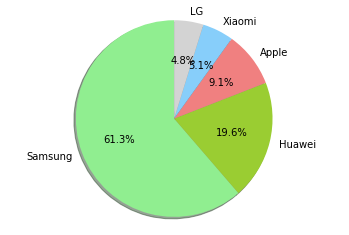

In [33]:
#Visualizations of the top 5 Vendor company in foldable phone market.
labels = topVendorName
sizes = [val[1] for val in topFiveVendors]
colors = ['lightgreen', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgrey']


# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

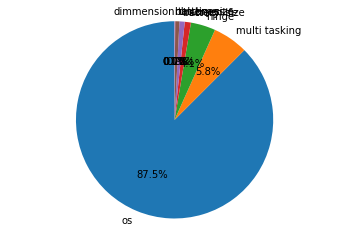

[20150, 1332, 935, 233, 198, 159, 21, 1, 0]


In [33]:
#Visualization of Key driven features of the foldable phones
labels =  [val[0] for val in analysisFeaturesData]
sizes = [val[1] for val in analysisFeaturesData]

colors = ['lightgreen', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgrey']


# Plot
plt.pie(sizes, labels=labels, 
autopct='%1.1f%%', startangle=90, )

plt.axis('equal')
plt.show()